<a href="https://colab.research.google.com/github/fridaruh/exp_usuario_pln/blob/master/Noticias_espa%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

Importando librerías

In [1]:
import pandas as pd #Dataframes, leer csv, excel, xlsx, etc.
import numpy as np #Manejo de matrices

# Carga de datos

Leer el archivo csv

In [2]:
base = pd.read_csv('/content/fakes1000.csv')
#df = pd.read_csv('/content/drive/MyDrive/Cursos/DBFT/fakes1000.csv')

In [3]:
base.shape

(2000, 2)

In [5]:
base.head(10) #Leer las primeras 5 filas

,class,Text
0,True,Algunas de las voces extremistas más conocida...
1,True,Después de casi dos años y medio de luchas po...
2,True,Dos periodistas birmanos de la agencia Reuter...
3,True,El Cuerpo Nacional de Policía ha detenido a c...
4,True,El desfile de la firma en Roma se convierte e...
5,True,El miedo a la pérdida de identidad y la avers...
6,True,El Ministerio de Exteriores de Rusia ha convo...
7,True,El nuevo plan migratorio del presidente parec...
8,True,"El secretario general de Podemos , Lander Mar..."
9,False,El suceso ha tenido lugar en Brasil. Un adole...


In [6]:
base.tail(10) #Leer las últimas 10 filas

,class,Text
1990,True,La Unión Extremadura ha denunciado este jueve...
1991,True,La Unidad contra el acoso escolar de la Comun...
1992,True,Telecom Castilla-La Mancha inicia un canal en...
1993,True,La Central Sindical Independiente y de Funcio...
1994,True,El secretario de Organización del PSOE de Mál...
1995,True,El Consejo de Gobierno ha dado su visto bueno...
1996,True,Investigadores valencianos han desarrollado u...
1997,True,Los arrestados actuaban en coches y en establ...
1998,True,El Rey ha encargado este miércoles a Pedro Sá...
1999,True,Las pruebas realizadas en el Centro Nacional ...


In [7]:
base.sample(5) #Obtener una muestra aleatoria de 5 filas

,class,Text
1021,False,"Joji, de 50 años, fue encontrado en su casa de..."
1208,False,La prestigiosa Universidad de Oxford ha tomado...
997,False,Hoy se ha firmado en Moncloa la vuelta de la '...
567,False,El británico que mató a 22 personas en un aten...
991,False,Holaaaa Comentarte que han quitado de la decla...


In [9]:
base.iloc[0]['Text']

' Algunas de las voces extremistas más conocidas de EE.UU., cuentas asociadas con al movimiento de la conocida como alt-right o ligadas a grupos antisemitas o xenófobos , han sido eliminadas de un plumazo de la redes sociales Facebook e Instagram. Se trat'

In [10]:
base.head()

,class,Text
0,True,Algunas de las voces extremistas más conocida...
1,True,Después de casi dos años y medio de luchas po...
2,True,Dos periodistas birmanos de la agencia Reuter...
3,True,El Cuerpo Nacional de Policía ha detenido a c...
4,True,El desfile de la firma en Roma se convierte e...


In [11]:
data = base['Text'].tolist()

In [13]:
#data

In [14]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A., U.K.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno (10-20),  e-mail
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 --> 15, 5 o 100% --> 100
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación 
'''

In [16]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower() #convierte a minúsculas
  token_2 = nltk.regexp_tokenize(token_1, pattern) #Quita los patrones definidos arriba y genera tokens
  texto.append(token_2)

In [19]:
#texto #[[noticia1],[noticia2],[noticia3]] --> noticia1 = ['el','cultivo','de','aguacate'...], ['el','cultivo','de','aguacate'...]

Convierto la lista de listas de noticias en una sola lista --> ['el', 'cultivo', 'de', 'aguacate', 'el', 'cultivo', 'de', 'aguacate']


In [23]:
flatten = [w for l in texto for w in l ]

In [27]:
#flatten

# Limpieza

In [28]:
import string

In [32]:
puntuacion = list(string.punctuation) #convierto signos de puntuación a una lista

In [44]:
puntuacion

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '...']

In [43]:
puntuacion.append('...')

## Stop Words

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
newStopWords = nltk.corpus.stopwords.words('spanish')

Quitamos las stopwords (artículos, preposiciones, adjetivos de lugar, etc.) pasándolos por un ciclo for

In [37]:
df = [w for w in flatten if w not in newStopWords ]

In [39]:
#df

Quitamos los signos de puntuación, también pasándolos por un ciclo for

In [40]:
df_2 = [w for w in df if w not in puntuacion]

In [42]:
#df_2

# Estadísticas del corpus

In [45]:
freqwords = nltk.FreqDist(df_2)

In [48]:
freqwords.most_common(15)

[('años', 207),
 ('según', 193),
 ('gobierno', 171),
 ('españa', 167),
 ('si', 146),
 ('tras', 142),
 ('año', 112),
 ('ser', 110),
 ('madrid', 105),
 ('sido', 102),
 ('pasado', 99),
 ('personas', 96),
 ('dos', 91),
 ('presidente', 89),
 ('euros', 89)]

In [49]:
word_com = freqwords.most_common(50)

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

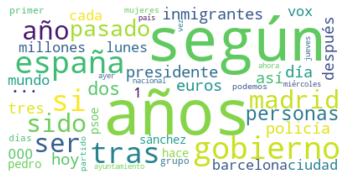

In [57]:
wordcloud = WordCloud(background_color= 'white', collocations=False, max_words=50).fit_words(freqwords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()